In [8]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('mnist_train.csv')
l=df['label']
d=df.drop('label',axis=1)
labels=l.head(1500)
data=d.head(1500)
standardized_data=StandardScaler().fit_transform(data)

C:\Users\anchal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\anchal\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
data_1000=standardized_data[0:1000,:]
labels_1000=labels[0:1000]

In [11]:
model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(data_1000)
#default perplexity=30
#default learning rate=200
#no. of iterations=1000

In [12]:
tsne_data=np.vstack((tsne_data.T,labels_1000)).T

In [13]:
tsne_df=pd.DataFrame(tsne_data,columns=('Dimension 1','Dimension 2','label'))

C:\Users\anchal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


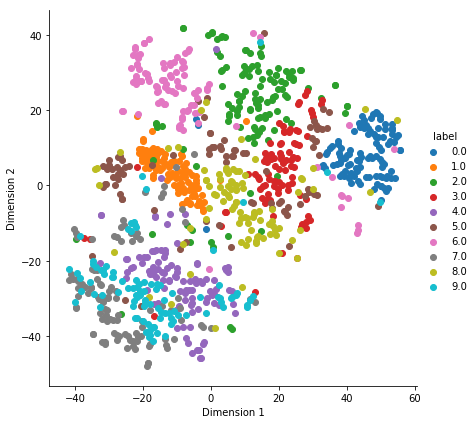

In [14]:
sns.FacetGrid(tsne_df,hue='label',size=6).map(plt.scatter,'Dimension 1','Dimension 2').add_legend()